In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

ModuleNotFoundError: No module named 'distutils'

In [86]:
data = pd.read_csv("29Y_IQR.csv")

In [87]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]

In [88]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size = 0.50, random_state = 69, stratify = label)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 69, stratify = Y_temp)


In [89]:
randoForest = RandomForestClassifier(n_estimators = 100, random_state = 69)
randoForest.fit(X_train, Y_train)

RandomForestClassifier(random_state=69)

In [90]:
validation_predict = randoForest.predict(X_val)
validation_proba = randoForest.predict_proba(X_val)

label_indices = [list(randoForest.classes_).index(label) for label in validation_predict]
predicted_val_proba = [validation_proba[i, label_idx] for i, label_idx in enumerate(label_indices)]

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))

              precision    recall  f1-score   support

        Corn       0.90      0.95      0.93       100
     E. coli       0.89      0.88      0.88       100
         FAE       0.92      0.97      0.94       100
        MSSA       0.95      0.90      0.92       100
        Malt       0.95      0.97      0.96       100
         PAO       0.99      0.92      0.95       100

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Accuracy 0.9316666666666666


In [91]:
test_predict =randoForest.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

              precision    recall  f1-score   support

        Corn       0.85      0.94      0.89       100
     E. coli       0.88      0.90      0.89       100
         FAE       0.97      0.95      0.96       100
        MSSA       0.93      0.87      0.90       100
        Malt       0.92      0.96      0.94       100
         PAO       0.99      0.90      0.94       100

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

Accuracy 0.92


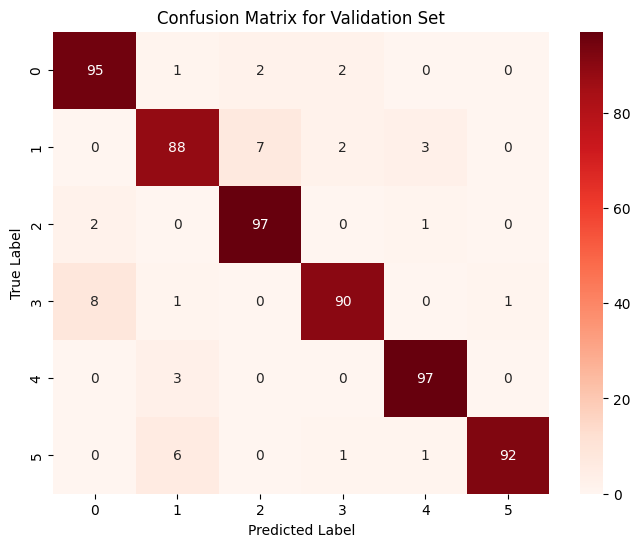

In [92]:
results_df = pd.DataFrame({'Predicted Label': validation_predict, 'Probability of Predicted Label': predicted_val_proba, 'True Label': Y_val})

true_labels = results_df["True Label"]
predicted_labels = results_df['Predicted Label']

confusionMatrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))

sns.heatmap(confusionMatrix, annot= True, fmt ="d", cmap="Reds")

plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [93]:
unique_labels = np.unique(np.concatenate((true_labels, predicted_labels)))
print("Order of labels in the confusion matrix:", unique_labels)

Order of labels in the confusion matrix: ['Corn' 'E. coli' 'FAE' 'MSSA' 'Malt' 'PAO']
